In [7]:
! pip install matplotlib
! pip install seaborn 
! pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 18.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 26.6 MB/s eta 0:00:0000:0100:01


In [11]:
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 


In [3]:
df = pd.read_csv("/home/kareemngh/E2E_ETL_project/Data/ml_ready_data.csv")

In [4]:
df.head()

,trip_distance,fare_amount,passenger_count,trip_duration,hour_of_day,day_of_week,weekend,fare_per_km
0,1.20,6.0,1,284,0,3,0,5.000000
1,13.69,42.0,2,2155,0,3,0,3.067933
2,0.95,6.5,1,362,0,3,0,6.842105
3,1.24,6.5,1,343,0,3,0,5.241935
4,1.10,7.0,1,434,0,3,0,6.363636


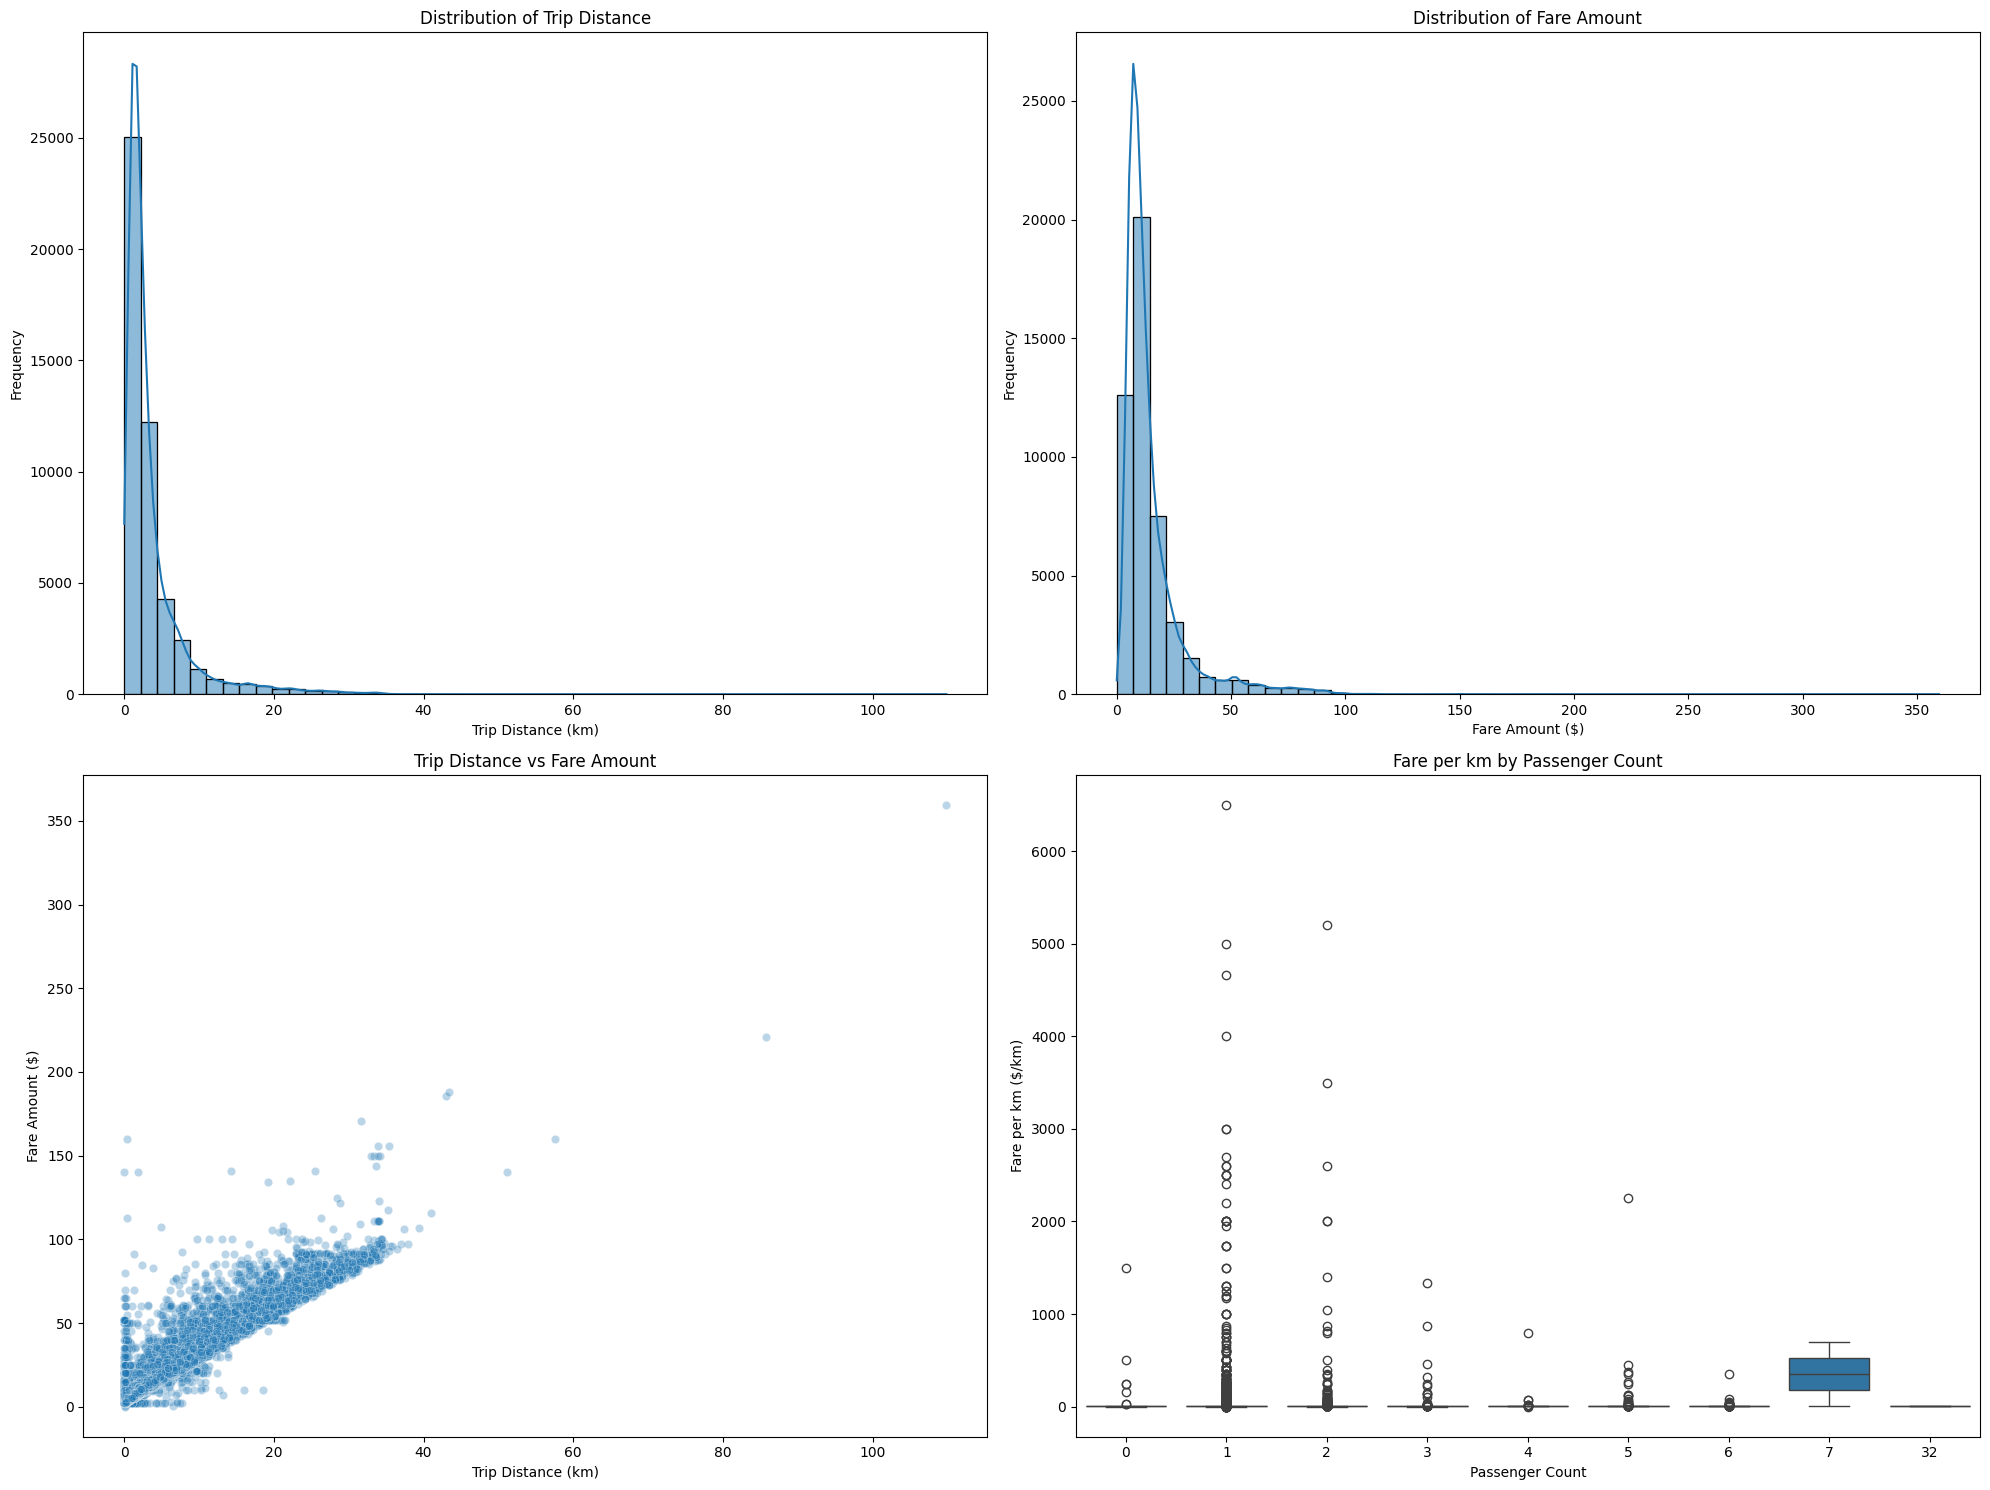

In [5]:

plt.figure(figsize=(20, 15))


plt.subplot(2, 2, 1)
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')


plt.subplot(2, 2, 4)
sns.boxplot(x='passenger_count', y='fare_per_km', data=df)
plt.title('Fare per km by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per km ($/km)')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split data into features and target
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")


# Show some example predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


Mean Squared Error: 16.51
       Actual  Predicted
2915      9.5   7.945884
19964     6.5   7.875397
5264      4.0   4.988579
13328     7.5   7.148718
16429     7.5   7.346393
